In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
%matplotlib inline

work_dir = '/home/jovyan/work/' #GPU server directory Duke Scavenger GPU

In [2]:
df = pd.read_csv(work_dir+'final_agg_50_r_yr.csv')

In [3]:
df = df[['track_id', 'premium', 'hist_user_behavior_is_shuffle',
       'context_type', 'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability', 'energy',
       'flatness', 'instrumentalness', 'liveness', 'loudness', 'mechanism',
       'organism', 'speechiness', 'tempo', 'valence', 'skipped_count',
       'not_skipped_count', 'total_count', 'release_year_tr']]

In [8]:
df['odds'] = df['skipped_count']/df['total_count']

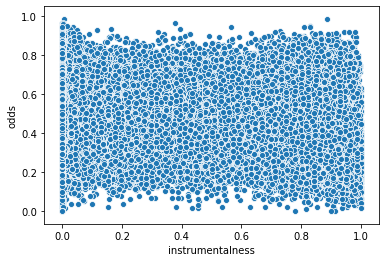

In [12]:
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

ax1 = sns.scatterplot(x="instrumentalness", y="odds", data=df)
ax1.get_figure().savefig(work_dir+'instrumental.png', bbox_inches='tight', transparent=True)

ax2 = sns.scatterplot(x="acousticness", y="odds", data=df)
ax2.get_figure().savefig(work_dir+'acousticness.png', bbox_inches='tight', transparent=True)

ax3 = sns.scatterplot(x="beat_strength", y="odds", data=df)
ax3.get_figure().savefig(work_dir+'beat_strength.png', bbox_inches='tight', transparent=True)

ax4 = sns.scatterplot(x="bounciness", y="odds", data=df)
ax4.get_figure().savefig(work_dir+'bounciness.png', bbox_inches='tight', transparent=True)

ax5 = sns.scatterplot(x="danceability", y="odds", data=df)
ax5.get_figure().savefig(work_dir+'danceability.png', bbox_inches='tight', transparent=True)

ax6 = sns.scatterplot(x="energy", y="odds", data=df)
ax6.get_figure().savefig(work_dir+'energy.png', bbox_inches='tight', transparent=True)

ax7 = sns.scatterplot(x="flatness", y="odds", data=df)
ax7.get_figure().savefig(work_dir+'flatness.png', bbox_inches='tight', transparent=True)

ax8 = sns.scatterplot(x="liveness", y="odds", data=df)
ax8.get_figure().savefig(work_dir+'liveness.png', bbox_inches='tight', transparent=True)

ax9 = sns.scatterplot(x="loudness", y="odds", data=df)
ax9.get_figure().savefig(work_dir+'loudness.png', bbox_inches='tight', transparent=True)

ax10 = sns.scatterplot(x="mechanism", y="odds", data=df)
ax10.get_figure().savefig(work_dir+'loudness.png', bbox_inches='tight', transparent=True)

ax11 = sns.scatterplot(x="organism", y="odds", data=df)
ax11.get_figure().savefig(work_dir+'loudness.png', bbox_inches='tight', transparent=True)

ax12 = sns.scatterplot(x="speechiness", y="odds", data=df)
ax12.get_figure().savefig(work_dir+'loudness.png', bbox_inches='tight', transparent=True)

ax13 = sns.scatterplot(x="tempo", y="odds", data=df)
ax13.get_figure().savefig(work_dir+'tempo.png', bbox_inches='tight', transparent=True)

ax14 = sns.scatterplot(x="valence", y="odds", data=df)
ax14.get_figure().savefig(work_dir+'valence.png', bbox_inches='tight', transparent=True)

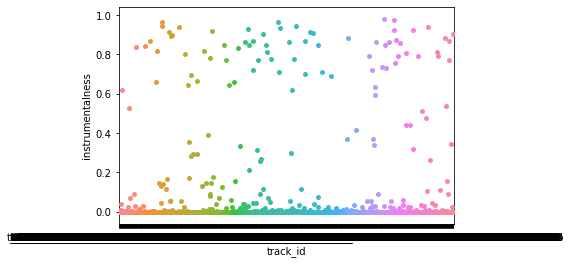

In [11]:
release_year = sns.boxplot(x="release_year_tr", y="odds", hue="hist_user_behavior_is_shuffle", data=tips)
release_year.get_figure().savefig(work_dir+'release_year_tr.png', bbox_inches='tight', transparent=True)

In [ ]:
playlist_type = sns.boxplot(x="context_type", y="odds", hue="hist_user_behavior_is_shuffle", data=tips)
playlist_type.get_figure().savefig(work_dir+'playlist_type.png', bbox_inches='tight', transparent=True)

In [ ]:
premium = sns.boxplot(x="premium", y="odds", hue="hist_user_behavior_is_shuffle", data=tips)
premium.get_figure().savefig(work_dir+'premium.png', bbox_inches='tight', transparent=True)

In [ ]:
premium = sns.boxplot(x="premium", y="odds", hue="hist_user_behavior_is_shuffle", data=tips)
premium.get_figure().savefig(work_dir+'premium.png', bbox_inches='tight', transparent=True)

In [7]:
eda_ry = df.groupby('release_year_tr')['skipped_count'].sum().reset_index()
eda_ry_total = df.groupby('release_year_tr')['total_count'].sum().reset_index()
jn_ry = eda_ry.set_index('release_year_tr').join(eda_ry_total.set_index('release_year_tr'), on='release_year_tr', how='inner').reset_index()

In [12]:
jn_ry['percentage'] = jn_ry['skipped_count']/jn_ry['total_count']

In [14]:
jn_ry['user_percentage'] = jn_ry['total_count']/sum(jn_ry['total_count'])

In [16]:
jn_ry['skipped_percentage'] = jn_ry['user_percentage'] * jn_ry['percentage']

Text(0.5, 1, 'Multi-Collinearity of Features')

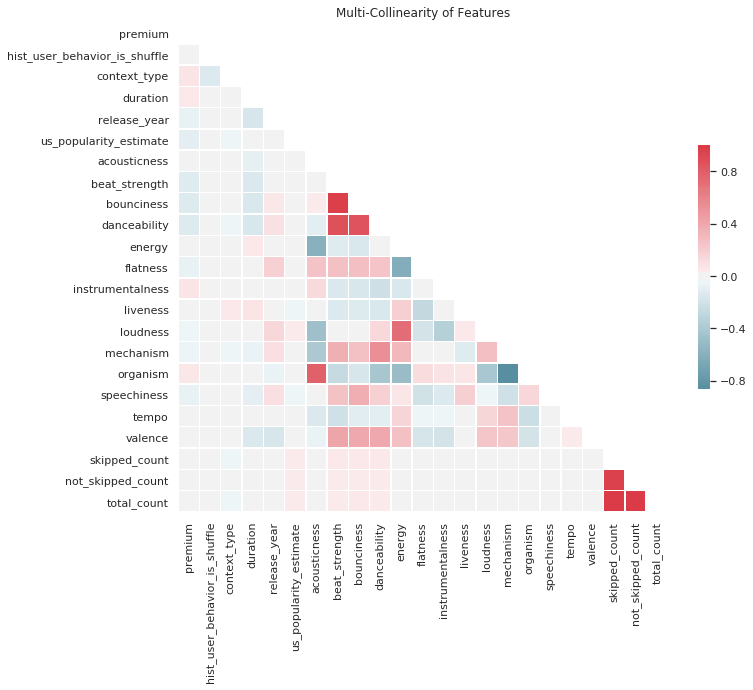

In [61]:
sns.set(style="white")
# Create a covariance matrix
corr = df.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

In [66]:
heatmap.get_figure().savefig(work_dir+'mc.png', bbox_inches='tight', transparent=True)

In [19]:
eda_shuffle_playlist = df.groupby(['hist_user_behavior_is_shuffle', 'context_type'])['skipped_count'].sum().reset_index()
eda_shuffle_playlist_total = df.groupby(['hist_user_behavior_is_shuffle', 'context_type'])['total_count'].sum().reset_index()
jn_shuffle_playlist = eda_shuffle_playlist.set_index(['hist_user_behavior_is_shuffle', 'context_type']).join(eda_shuffle_playlist_total.set_index(['hist_user_behavior_is_shuffle', 'context_type']), on=['hist_user_behavior_is_shuffle', 'context_type'], how='inner').reset_index()

In [20]:
jn_shuffle_playlist['percentage'] = jn_shuffle_playlist['skipped_count']/jn_shuffle_playlist['total_count']
user_sum = sum(jn_shuffle_playlist['total_count'])
jn_shuffle_playlist['user_percentage'] = jn_shuffle_playlist['total_count']/user_sum
jn_shuffle_playlist['skip_proportion'] = jn_shuffle_playlist['percentage']*jn_shuffle_playlist['user_percentage']

In [25]:
jn_shuffle_playlist.sort_values('context_type')

,hist_user_behavior_is_shuffle,context_type,skipped_count,total_count,percentage,user_percentage,skip_proportion
0,0,0,48138114.0,94799842.0,0.507787,0.120956,0.061420
6,1,0,30354589.0,60220360.0,0.504059,0.076836,0.038730
1,0,1,90991832.0,185510505.0,0.490494,0.236695,0.116097
7,1,1,79633645.0,132853099.0,0.599411,0.169509,0.101605
2,0,2,59830100.0,109801801.0,0.544892,0.140097,0.076338
3,0,3,4082740.0,9658734.0,0.422699,0.012324,0.005209
8,1,3,2489671.0,5721605.0,0.435135,0.007300,0.003177
4,0,4,57763196.0,132857745.0,0.434775,0.169515,0.073701
9,1,4,17950771.0,39423883.0,0.455327,0.050301,0.022904
5,0,5,4000548.0,7404498.0,0.540286,0.009447,0.005104


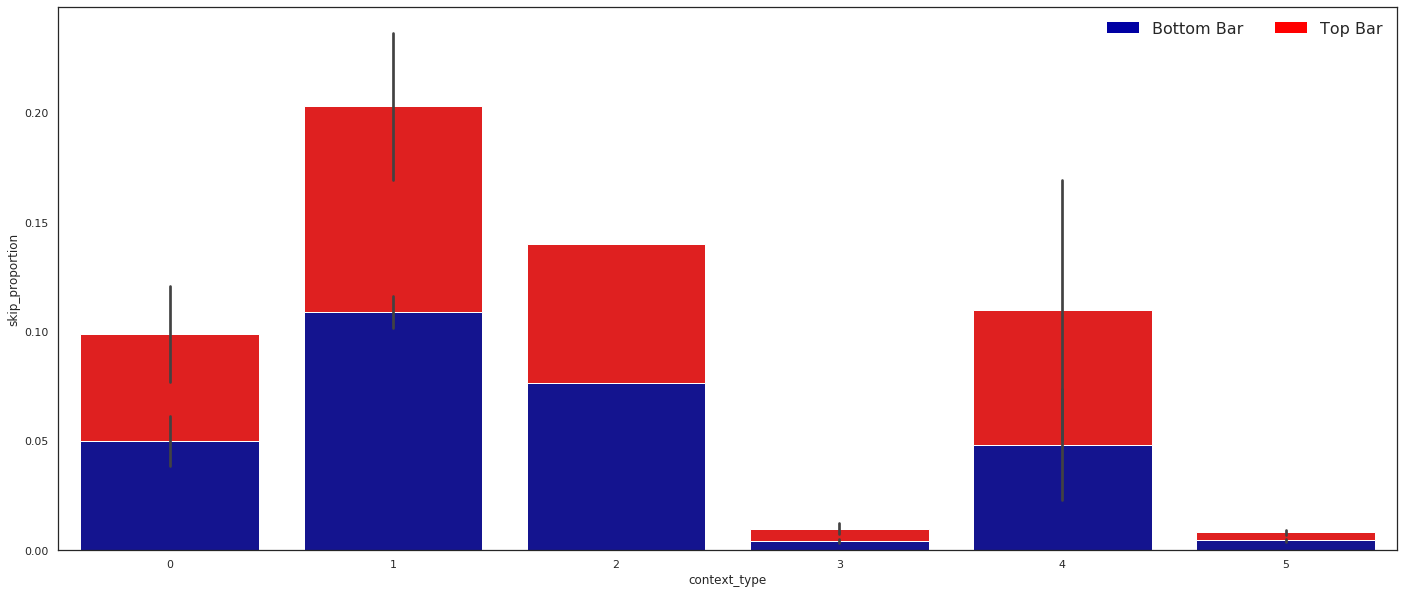

In [93]:
sns.set_style("white")
sns.set_context({"figure.figsize": (24, 10)})

sns.barplot(x = jn_shuffle_playlist.context_type, y = jn_shuffle_playlist.user_percentage, color = "red")
bottom_plot = sns.barplot(x = jn_shuffle_playlist.context_type, y = jn_shuffle_playlist.skip_proportion, color = "#0000A3")

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

In [34]:
t = dict(editorial_playlist=0, user_collection=1, radio=2,personalized_playlist=3, catalog=4, charts=5)

In [40]:
jn_shuffle_playlist

,hist_user_behavior_is_shuffle,context_type,skipped_count,total_count,percentage,user_percentage,skip_proportion
0,0,0,48138114.0,94799842.0,0.507787,0.120956,0.061420
1,0,1,90991832.0,185510505.0,0.490494,0.236695,0.116097
2,0,2,59830100.0,109801801.0,0.544892,0.140097,0.076338
3,0,3,4082740.0,9658734.0,0.422699,0.012324,0.005209
4,0,4,57763196.0,132857745.0,0.434775,0.169515,0.073701
5,0,5,4000548.0,7404498.0,0.540286,0.009447,0.005104
6,1,0,30354589.0,60220360.0,0.504059,0.076836,0.038730
7,1,1,79633645.0,132853099.0,0.599411,0.169509,0.101605
8,1,3,2489671.0,5721605.0,0.435135,0.007300,0.003177
9,1,4,17950771.0,39423883.0,0.455327,0.050301,0.022904
